In [1]:
# Load all libraries

import xarray
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [2]:
# Find only the PRECC files in the history files

files_PRECC_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/*.PRECC.*')
files_PRECC = files_PRECC_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
print(files_PRECC)
print(len(files_PRECC))

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.PRECC.185001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/d

In [3]:
# Process the datasets

PRECC_data = xarray.open_mfdataset(files_PRECC,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
PRECC_data

<xarray.Dataset>
Dimensions:              (cosp_prs: 7, cosp_tau: 7, cosp_scol: 10, cosp_ht: 40,
                          cosp_sr: 15, cosp_sza: 5, cosp_htmisr: 16,
                          cosp_tau_modis: 6, nbnd: 2, ilev: 31, lat: 192,
                          lev: 30, lon: 288, slat: 191, slon: 288, time: 1872,
                          ensemble_mem: 35)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_tau_bnds        (cosp_tau, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_ht_bnds         (cosp_ht, nbnd) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    cosp_sr_bnds         (cosp_sr, nbnd) float64 dask.array<chunksize=(15, 2), meta=np.ndarray>
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 dask.array<chunksize=(16, 2), meta=np.ndarray>
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 dask.array<chunksize=(6, 2), meta=np.ndarray>
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 dask.array<chunksize=(1, 1872), meta=np.ndarray>
    time_bnds            (ensemble_mem, time, nbnd) object dask.array<chunksize=(1, 1872, 2), meta=np.ndarray>
    time_written         (ensemble_mem, time) object dask.array<chunksize=(1, 1872), meta=np.ndarray>
    w_stag               (ensemble_mem, slat) float64 dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax              (ensemble_mem, lat) int32 dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.001
    title:                     UNSET
    logname:                   mai
    host:                      ys5830
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B1850C5CN.f09_g16.005.cam.i.0402-01-01-0...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Aug 23 21:58:33 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [18]:
PRECC_data.PRECC

<xarray.DataArray 'PRECC' (ensemble_mem: 35, time: 1872, lat: 192, lon: 288)>
dask.array<concatenate, shape=(35, 1872, 192, 288), dtype=float32, chunksize=(1, 1872, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: ensemble_mem
Attributes:
    units:         m/s
    long_name:     Convective precipitation rate (liq + ice)
    cell_methods:  time: mean

In [4]:
# Find only the PRECL files in the history files

files_PRECL_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/*.PRECL.*')
files_PRECL = files_PRECL_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
print(files_PRECL)
print(len(files_PRECL))

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.PRECL.185001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/d

In [5]:
# Process the datasets

PRECL_data = xarray.open_mfdataset(files_PRECL,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
PRECL_data

<xarray.Dataset>
Dimensions:              (cosp_prs: 7, cosp_tau: 7, cosp_scol: 10, cosp_ht: 40,
                          cosp_sr: 15, cosp_sza: 5, cosp_htmisr: 16,
                          cosp_tau_modis: 6, nbnd: 2, ilev: 31, lat: 192,
                          lev: 30, lon: 288, slat: 191, slon: 288, time: 1872,
                          ensemble_mem: 35)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_tau_bnds        (cosp_tau, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_ht_bnds         (cosp_ht, nbnd) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    cosp_sr_bnds         (cosp_sr, nbnd) float64 dask.array<chunksize=(15, 2), meta=np.ndarray>
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 dask.array<chunksize=(16, 2), meta=np.ndarray>
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 dask.array<chunksize=(6, 2), meta=np.ndarray>
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 dask.array<chunksize=(1, 1872), meta=np.ndarray>
    time_bnds            (ensemble_mem, time, nbnd) object dask.array<chunksize=(1, 1872, 2), meta=np.ndarray>
    time_written         (ensemble_mem, time) object dask.array<chunksize=(1, 1872), meta=np.ndarray>
    w_stag               (ensemble_mem, slat) float64 dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax              (ensemble_mem, lat) int32 dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.001
    title:                     UNSET
    logname:                   mai
    host:                      ys5830
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B1850C5CN.f09_g16.005.cam.i.0402-01-01-0...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Aug 23 21:58:49 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [17]:
PRECL_data.PRECL

<xarray.DataArray 'PRECL' (ensemble_mem: 35, time: 1872, lat: 192, lon: 288)>
dask.array<concatenate, shape=(35, 1872, 192, 288), dtype=float32, chunksize=(1, 1872, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: ensemble_mem
Attributes:
    units:         m/s
    long_name:     Large-scale (stable) precipitation rate (liq + ice)
    cell_methods:  time: mean

In [6]:
# Similar to the omega data, I'll take the last 30 years and average over them and the ensemble

PRECC_last30 = PRECC_data.PRECC.sel(time=slice("1976","2006"))
PRECC_avg = PRECC_last30.mean(('time','ensemble_mem'))
PRECC_avg

<xarray.DataArray 'PRECC' (lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [7]:
PRECC_avg.load()

<xarray.DataArray 'PRECC' (lat: 192, lon: 288)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.69557929e-17, 0.00000000e+00, 0.00000000e+00, ...,
        8.61394788e-17, 5.94291815e-17, 3.73209731e-17],
       ...,
       [4.24170891e-14, 4.31924157e-14, 4.32419095e-14, ...,
        3.12579213e-14, 3.46945271e-14, 3.78511885e-14],
       [3.35817630e-14, 3.33518850e-14, 3.86684398e-14, ...,
        3.39090328e-14, 3.15830024e-14, 3.17661784e-14],
       [1.42593304e-14, 1.44224656e-14, 1.46837634e-14, ...,
        1.38135785e-14, 1.39480534e-14, 1.40183877e-14]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [8]:
# Do the same for PRECL Data

PRECL_last30 = PRECL_data.PRECL.sel(time=slice("1976","2006"))
PRECL_avg = PRECL_last30.mean(('time','ensemble_mem'))
PRECL_avg

<xarray.DataArray 'PRECL' (lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [9]:
PRECL_avg.load()

<xarray.DataArray 'PRECL' (lat: 192, lon: 288)>
array([[2.0224793e-09, 2.0225777e-09, 2.0225803e-09, ..., 2.0225766e-09,
        2.0224822e-09, 2.0225928e-09],
       [2.0926454e-09, 2.0942068e-09, 2.0960975e-09, ..., 2.0889814e-09,
        2.0899342e-09, 2.0910704e-09],
       [1.6219038e-09, 1.6185614e-09, 1.6144368e-09, ..., 1.6314782e-09,
        1.6279109e-09, 1.6249617e-09],
       ...,
       [7.0240489e-09, 7.0371682e-09, 7.0494632e-09, ..., 6.9849850e-09,
        6.9983312e-09, 7.0119812e-09],
       [6.6191577e-09, 6.6318173e-09, 6.6453074e-09, ..., 6.5818790e-09,
        6.5935697e-09, 6.6066757e-09],
       [5.8822458e-09, 5.8822982e-09, 5.8822476e-09, ..., 5.8821845e-09,
        5.8821930e-09, 5.8822329e-09]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [10]:
# Total precipitation

PRECT = PRECL_avg + PRECC_avg
PRECT.load()

<xarray.DataArray (lat: 192, lon: 288)>
array([[2.0224793e-09, 2.0225777e-09, 2.0225803e-09, ..., 2.0225766e-09,
        2.0224822e-09, 2.0225928e-09],
       [2.0926454e-09, 2.0942068e-09, 2.0960975e-09, ..., 2.0889814e-09,
        2.0899342e-09, 2.0910704e-09],
       [1.6219038e-09, 1.6185614e-09, 1.6144368e-09, ..., 1.6314783e-09,
        1.6279110e-09, 1.6249617e-09],
       ...,
       [7.0240915e-09, 7.0372113e-09, 7.0495063e-09, ..., 6.9850161e-09,
        6.9983659e-09, 7.0120190e-09],
       [6.6191914e-09, 6.6318506e-09, 6.6453461e-09, ..., 6.5819128e-09,
        6.5936012e-09, 6.6067076e-09],
       [5.8822600e-09, 5.8823124e-09, 5.8822622e-09, ..., 5.8821983e-09,
        5.8822067e-09, 5.8822471e-09]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Total Precipitation - 1976-2006 Average (m/s)')

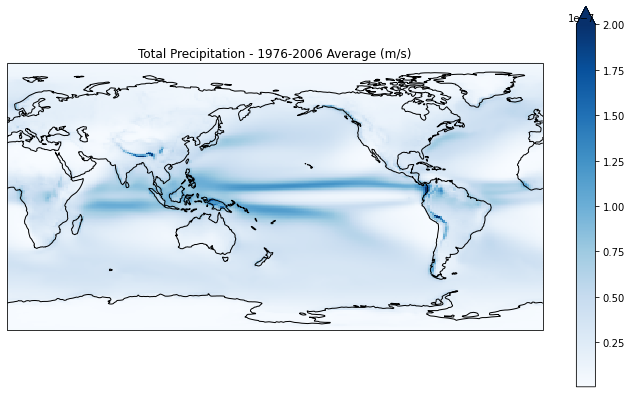

In [11]:
# Plate Carree Projection

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
PRECT.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', vmax=2.0e-7)
ax.coastlines(color='black', linewidth=1)
plt.title('Total Precipitation - 1976-2006 Average (m/s)')

# Add motion contours

In [12]:
# Get the vertical motion datasets

files_omega_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.*.OMEGA.192001-200512.nc')
files_omega = files_omega_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
# Eject 001 - includes 1850-1920
#files_hist.remove('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.TREFHT.185001-200512.nc')
print(files_omega)
print(len(files_omega))

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.010.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/d

In [13]:
# Process the datasets

omega = xarray.open_mfdataset(files_omega,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
omega

<xarray.Dataset>
Dimensions:              (cosp_prs: 7, nbnd: 2, cosp_tau: 7, cosp_scol: 10,
                          cosp_ht: 40, cosp_sr: 15, cosp_sza: 5,
                          cosp_htmisr: 16, cosp_tau_modis: 6, ensemble_mem: 34,
                          time: 1032, lev: 30, lat: 192, lon: 288, ilev: 31,
                          slat: 191, slon: 288)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_tau_bnds        (cosp_tau, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_ht_bnds         (cosp_ht, nbnd) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    cosp_sr_bnds         (cosp_sr, nbnd) float64 dask.array<chunksize=(15, 2), meta=np.ndarray>
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 dask.array<chunksize=(16, 2), meta=np.ndarray>
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 dask.array<chunksize=(6, 2), meta=np.ndarray>
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    time_bnds            (ensemble_mem, time, nbnd) object dask.array<chunksize=(1, 1032, 2), meta=np.ndarray>
    time_written         (ensemble_mem, time) |S8 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    w_stag               (ensemble_mem, slat) float64 dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax              (ensemble_mem, lat) int32 dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.002
    title:                     UNSET
    logname:                   mai
    host:                      ys1329
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Tue Aug 13 10:43:44 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [14]:
# Getting vertical velocity at around 500 mb

omega_500 = omega['OMEGA'].sel(lev=524.687175, method='nearest')
omega_500

<xarray.DataArray 'OMEGA' (ensemble_mem: 34, time: 1032, lat: 192, lon: 288)>
dask.array<getitem, shape=(34, 1032, 192, 288), dtype=float32, chunksize=(1, 1032, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: ensemble_mem
Attributes:
    mdims:         1
    units:         Pa/s
    long_name:     Vertical velocity (pressure)
    cell_methods:  time: mean

In [15]:
# Only the last 30 years - average over those years 

omega_500_last30 = omega_500.sel(time=slice("1976","2006"))
omega_averaged_time = omega_500_last30.mean('time')
omega_averaged_time

<xarray.DataArray 'OMEGA' (ensemble_mem: 34, lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(34, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: ensemble_mem

In [16]:
# Average over ensemble members

omega_averaged = omega_averaged_time.mean('ensemble_mem')
omega_averaged

<xarray.DataArray 'OMEGA' (lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [17]:
# Compute

omega_averaged.load()
print(omega_averaged)

<xarray.DataArray 'OMEGA' (lat: 192, lon: 288)>
array([[-0.00065632, -0.00065632, -0.00065632, ..., -0.00065632,
        -0.00065632, -0.00065632],
       [-0.00354737, -0.00367282, -0.00369522, ..., -0.00267125,
        -0.00302047, -0.00332354],
       [ 0.01222138,  0.01208865,  0.01193358, ...,  0.01253631,
         0.01243667,  0.01233596],
       ...,
       [-0.00047996, -0.00043941, -0.00039858, ..., -0.00059823,
        -0.00055958, -0.00052006],
       [-0.00265366, -0.00277356, -0.00289154, ..., -0.00228347,
        -0.00240916, -0.00253222],
       [-0.00335131, -0.00335131, -0.00335131, ..., -0.00335131,
        -0.00335131, -0.00335131]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8


Text(0.5, 1.0, 'Total Precipitation (m/s) - With vertical motion contours')

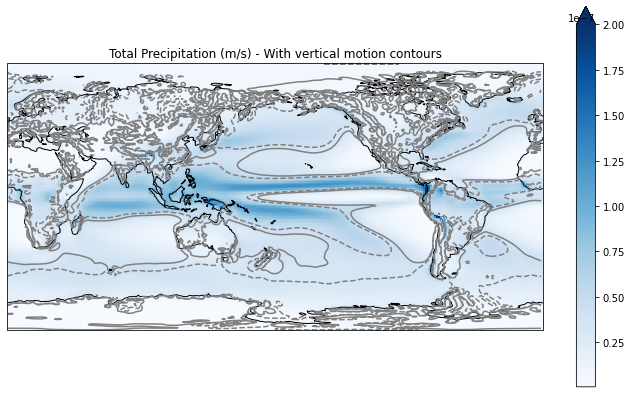

In [18]:
# Plate Carree Projection - Adding contours

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
PRECT.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', vmax=2.0e-7)
omega_averaged.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Total Precipitation (m/s) - With vertical motion contours')

# Plotting Precipitation as Contours

Text(0.5, 1.0, 'Precipitation as Contours')

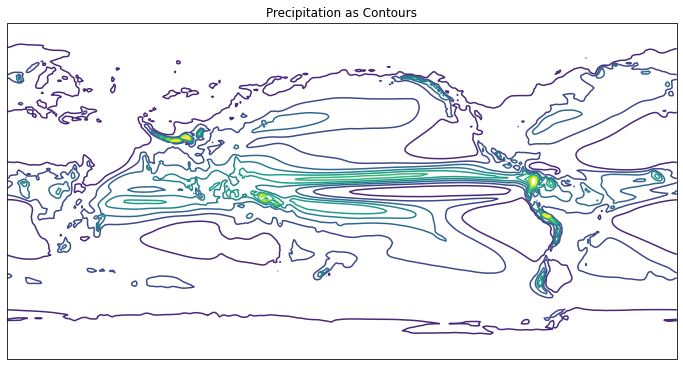

In [25]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
PRECT.plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,2.0e-7,2e-8))
plt.title('Precipitation as Contours')